In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn import metrics

In [61]:
adm = pd.read_csv("Admission_Predict.csv")
adm.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


**Get the Data**

In [ ]:
adm.describe()

In [ ]:
adm.info()

**Data Preprocessing**

In [ ]:
adm.isnull().sum()

**Exploratory Data Analysis**

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(adm['CGPA'], bins=30)
plt.show()

In [ ]:
sns.pairplot(adm)

In [ ]:

sns.heatmap(adm.corr(), annot=True)


In [49]:
X=adm[['GRE Score','CGPA']]

print(X.shape)

Y=adm['Chance of Admit '].values.reshape(-1,1)
print(Y.shape)

(400, 2)
(400, 1)


In [78]:
from sklearn.model_selection import train_test_split
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 2)
(320, 2)
(80, 2)
(320, 1)
(80, 1)


**Training the model**

In [79]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#To retrieve the intercept:
print(lin_model.intercept_)  #theta0
#For retrieving the slope:
print(lin_model.coef_)    #theta1 & theta2

[-1.6080176]
[[0.00270774 0.17126734]]


**Predicting Test Data**

In [81]:
y_pred = lin_model.predict(X_test)
#print(y_pred.flatten())

In [ ]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [83]:
df1 = df.head(25)

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
accuracy=lin_model.score(X_test,Y_test)

print(accuracy)

Mean Squared Error: 0.003757198959309258
Root Mean Squared Error: 0.06129599464328202
0.7440164224623227


(2, 49)


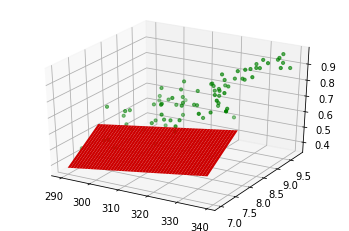

In [88]:
plt3d = plt.figure().gca(projection = '3d')
X1 = np.array(X_test['GRE Score'])
X2 = np.array(X_test['CGPA'])
plt3d.scatter(np.array(X1),np.array(X2),np.array(Y_test[:,0]),color = 'g',s=10)

i=int(min(X1))
j=int(max(X1))
k=int(min(X2))
l=int(max(X2))
xx1 , xx2 = np.meshgrid(range(i,j),range(k,l))
#print(xx1)
#print(xx2)

P=lin_model.intercept_+lin_model.coef_[:,0]*xx1+lin_model.coef_[:,1]*xx2
print(P.shape)
plt3d.plot_surface(xx1,xx2,P,color = 'r')

